In [67]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv", index_col=False) #reading csv raw data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
a=data.columns
a

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#data.info

print("The number of rows:", len(data))
print("number of columns:" ,len(data.columns))

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isnull().sum()  

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* There are no nulls in the given data frame

In [25]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:>

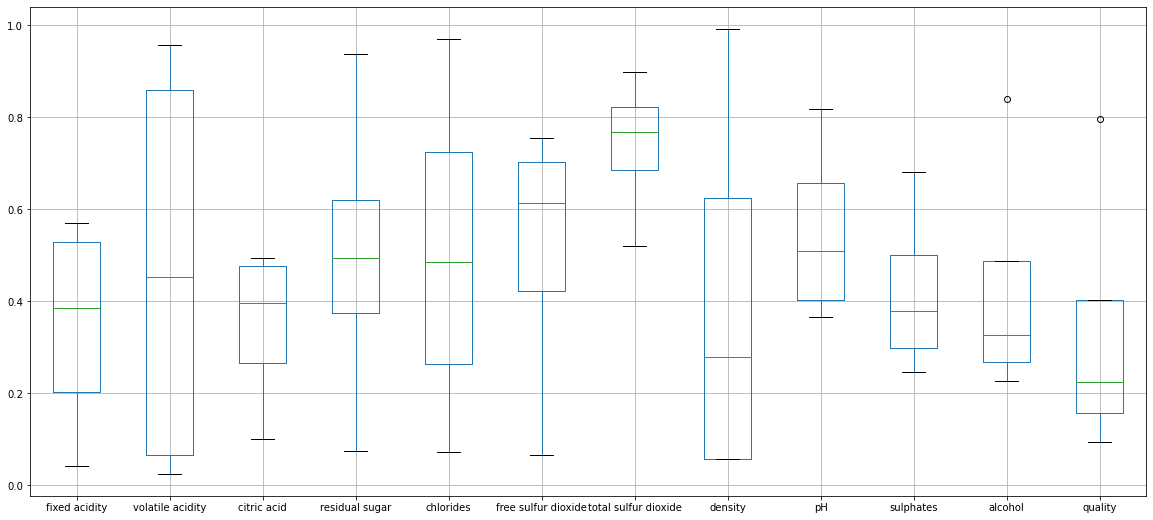

In [9]:
df = pd.DataFrame(data = np.random.random(size=(4,12)), columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])
plt.figure(figsize=(20,9)) 
df.boxplot()


* As we can observe from the graph, column "alcohol" and "quality"  have outliers

Text(0, 0.5, 'alcohol')

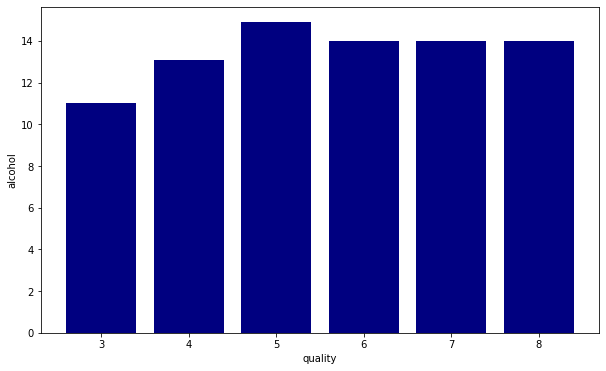

In [11]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(data['quality'],data['alcohol'],color='navy')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

* The quality of wine increases with increase the percent of alcohol in the wine.

<AxesSubplot:xlabel='quality'>

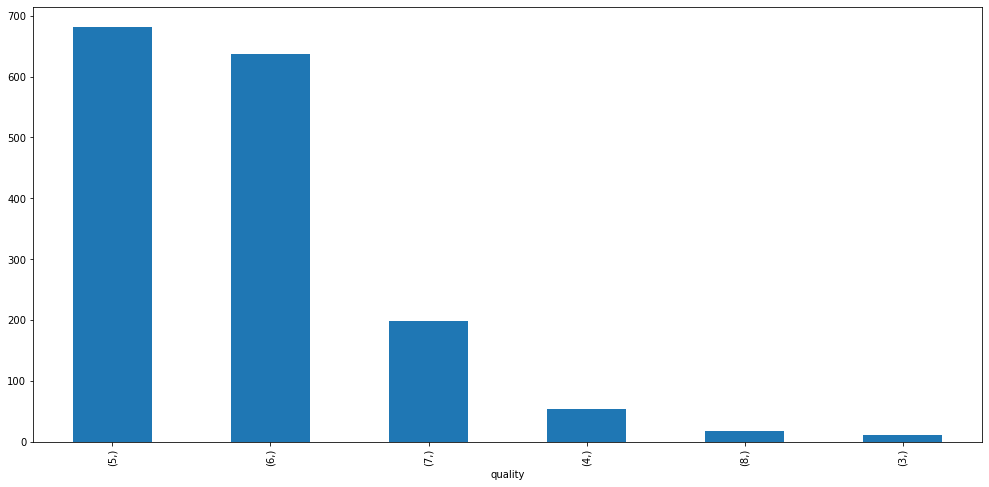

In [26]:
plt.figure(figsize=(17,8)) 
data[['quality']].value_counts().plot(kind="bar")



In [27]:
data[['quality']].value_counts()

quality
5          681
6          638
7          199
4           53
8           18
3           10
dtype: int64

* From the bar graph we can observe that "quality" 8 is the highest value with count of 18

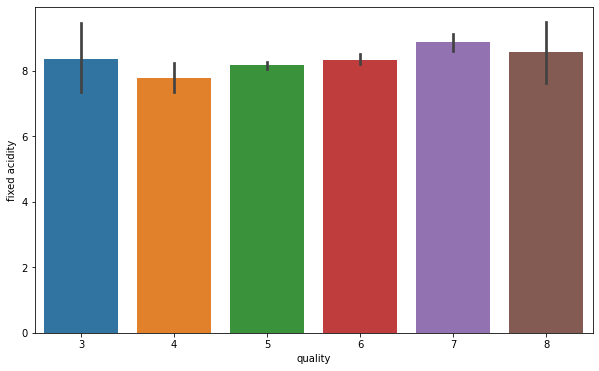

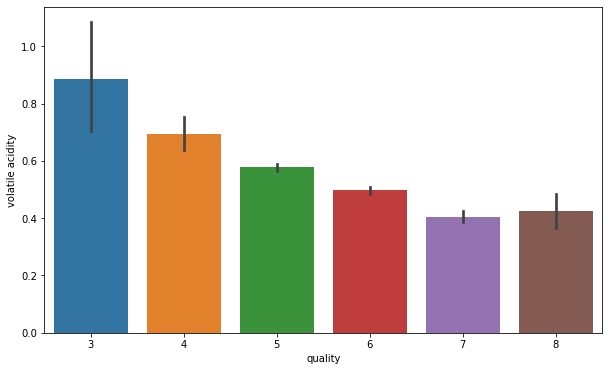

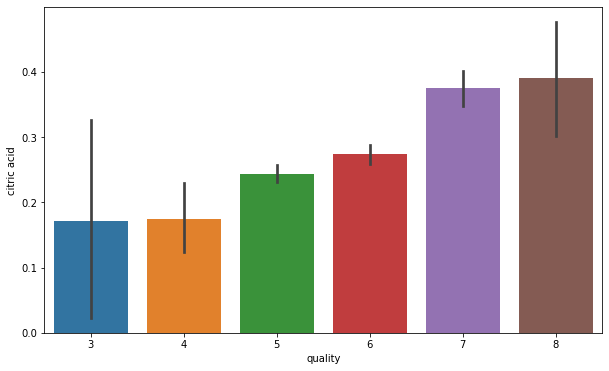

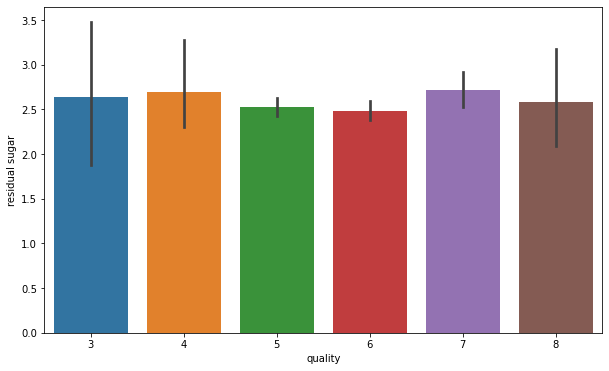

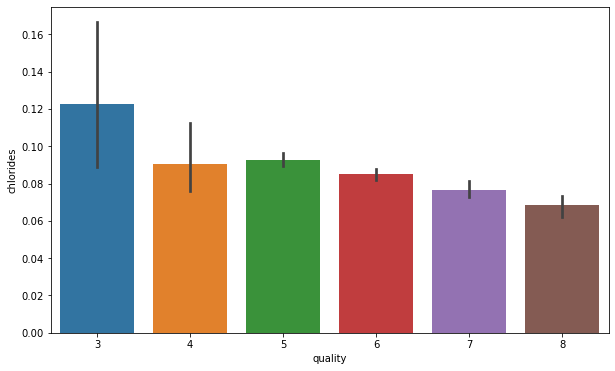

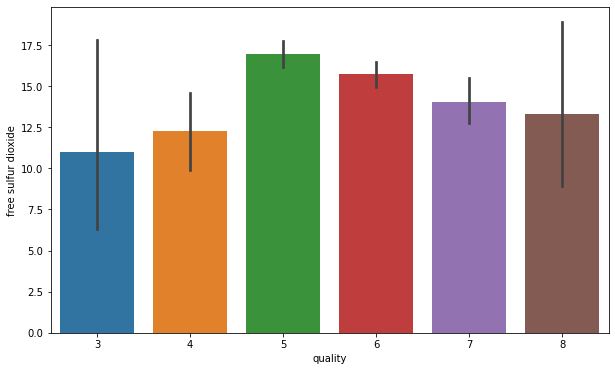

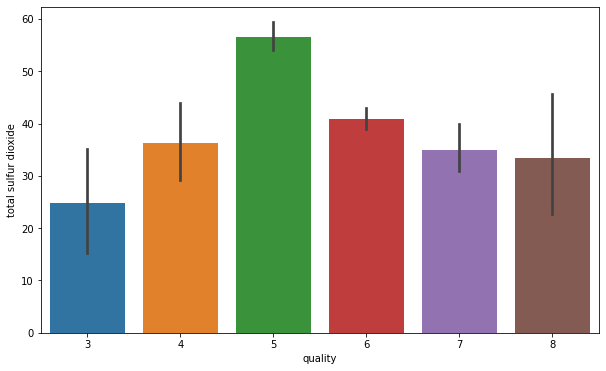

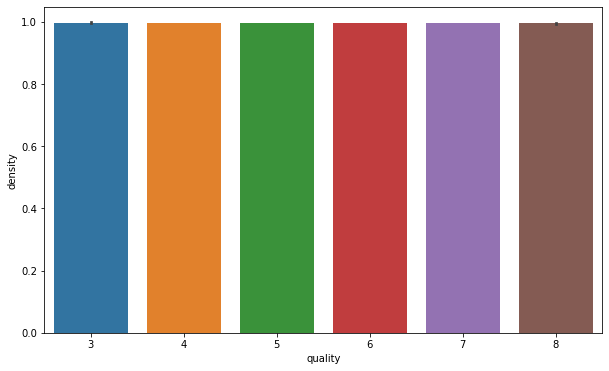

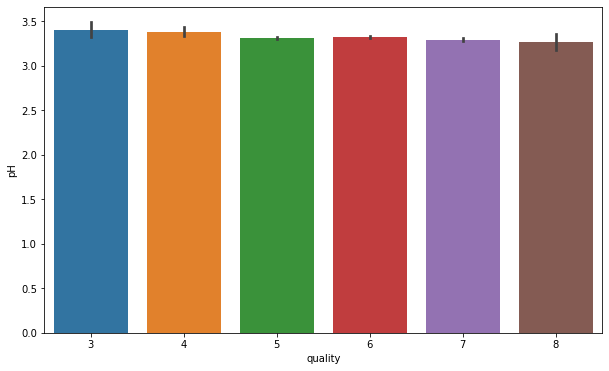

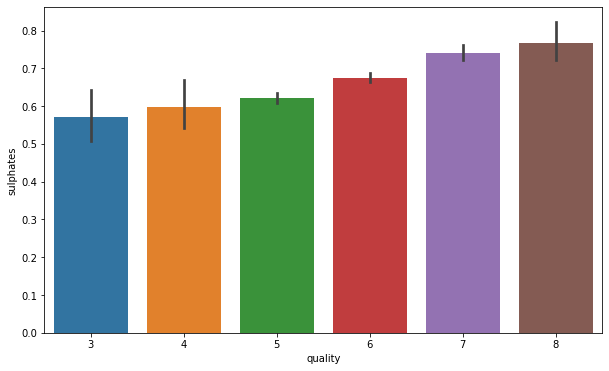

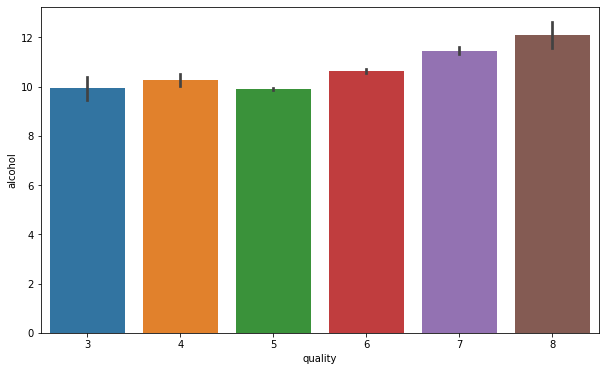

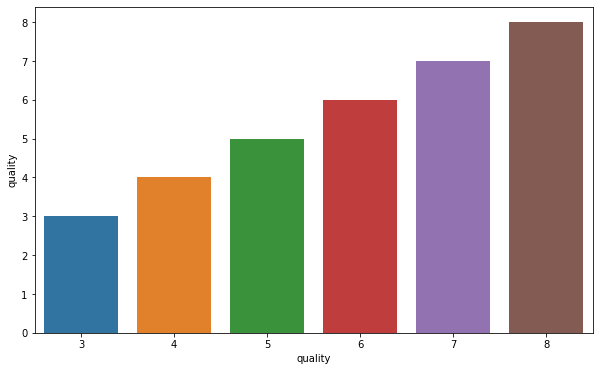

In [27]:
for i, cols in enumerate(data.columns):
    plt.figure(figsize=[10,6])
    sns.barplot(x='quality',y=cols,data=data)

### Correlation

<AxesSubplot:>

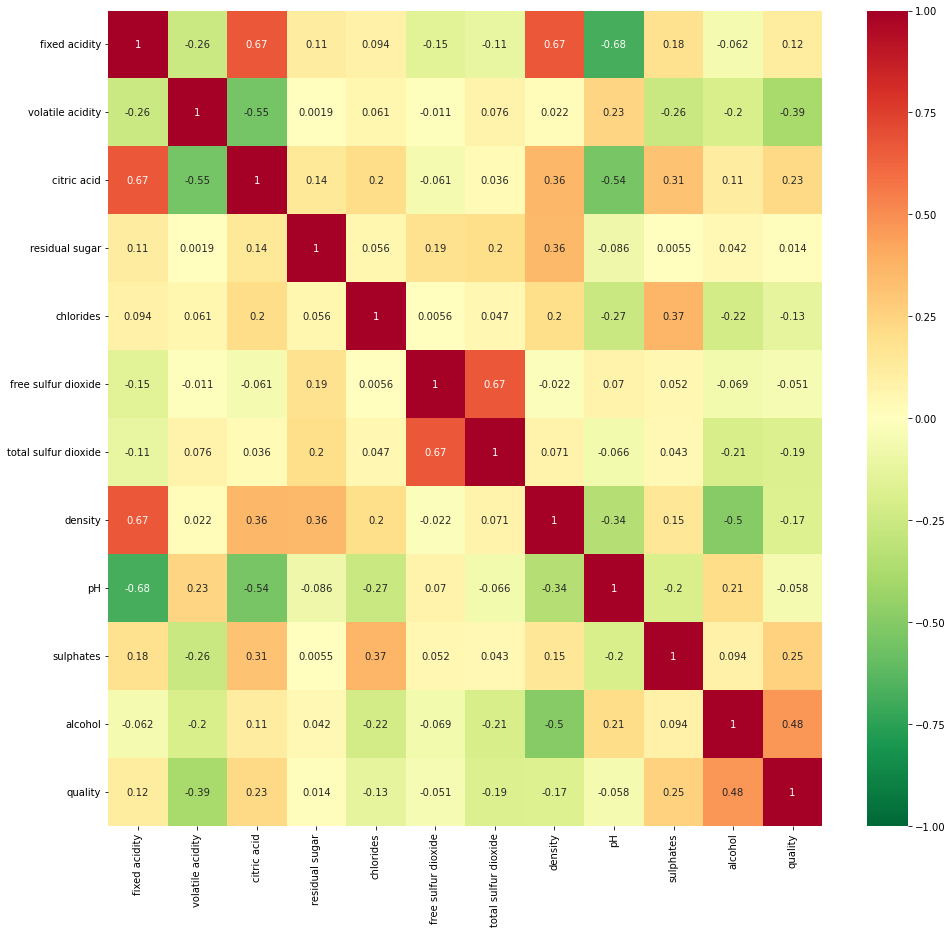

In [7]:
plt.figure(figsize=(16, 15))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn_r', vmax=1,vmin=-1, center=0)

### Data Processing

In [37]:
X = data.drop("quality", axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Label Binarization

In [38]:
Y = data['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

* By the above code it is defined that 1 is "good" and 0 is "bad" according to the quality of wine

### Train & Test data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2,test_size=0.2)  ## Split data for train and test.
print(Y_train.shape, Y_test.shape,Y.shape)

(1279,) (320,) (1599,)


### Model Training

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [44]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### Model Evaluation

In [58]:
from sklearn.metrics import accuracy_score
X_prediction = model.predict( X_test)
test_accuracy= accuracy_score(X_prediction,Y_test)
print("Test accuracy:", (test_accuracy ))

Test accuracy: 0.921875


In [68]:
y_pred_rf = model.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(Y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       279
           1       0.75      0.59      0.66        41

    accuracy                           0.92       320
   macro avg       0.85      0.78      0.81       320
weighted avg       0.92      0.92      0.92       320



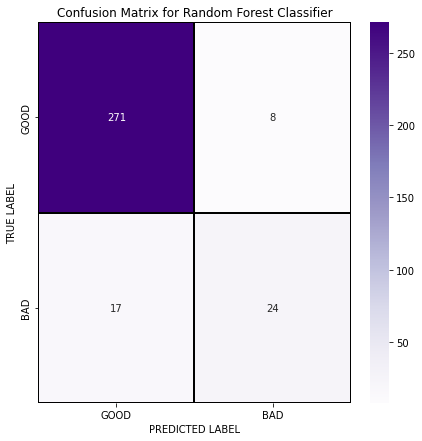

In [69]:
cm = confusion_matrix(Y_test, y_pred_rf)
x_axis_labels = ["GOOD", "BAD"]
y_axis_labels = ["GOOD", "BAD"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [79]:
preds = model.predict(X_test)
print(preds[:36])
print(Y_test[:36].values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]


* From the confusion matrix, we saw that our train and test data is balanced. from the prediction we can see the "good" and "bad" quality wine, where "1" is good and "0" is bad